# CAS BDAI CUP SUBMISSION NOTEBOOK - Group 2



# Import Data

In [1]:
#import data
import pandas as pd
train = pd.read_csv("https://raw.githubusercontent.com/casbdai/notebooks2023/main/Module3/99_CAS_BDAI_CUP/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/casbdai/notebooks2023/main/Module3/99_CAS_BDAI_CUP/test.csv")

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30857 entries, 0 to 30856
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         30857 non-null  object 
 1   year          30857 non-null  int64  
 2   price         30857 non-null  int64  
 3   transmission  30857 non-null  object 
 4   mileage       30857 non-null  int64  
 5   fuelType      30857 non-null  object 
 6   tax           30857 non-null  int64  
 7   mpg           30857 non-null  float64
 8   engineSize    30857 non-null  float64
 9   brand         30857 non-null  object 
 10  ID            30857 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 2.6+ MB


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15896 entries, 0 to 15895
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15896 non-null  object 
 1   year          15896 non-null  int64  
 2   transmission  15896 non-null  object 
 3   mileage       15896 non-null  int64  
 4   fuelType      15896 non-null  object 
 5   tax           15896 non-null  int64  
 6   mpg           15896 non-null  float64
 7   engineSize    15896 non-null  float64
 8   brand         15896 non-null  object 
 9   ID            15896 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 1.2+ MB


# Explore the train data set

For example, what are the different tax amounts?

In [4]:
train["tax"].unique()

array([145, 160,  30, 325, 200, 150, 125,  20,   0, 300, 235, 205, 165,
       135, 305, 315, 260, 265, 555, 195, 220, 155, 240, 140, 115, 570,
       565, 120, 185, 330, 190, 270, 255, 580, 130, 540, 245, 280, 230,
       290, 210,  10, 110])

What's the cheapest car, etc?

In [5]:
train["price"].min()
#train["transmission"].unique()

650

## Prepare the data

In [6]:
#encode categorical data
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

train.head()

,year,price,mileage,tax,mpg,engineSize,ID,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,model_ X3,model_ X5,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,brand_BMW,brand_Mercedes,brand_VW
0,2020,29999,2728,145,47.9,2.0,40452,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,8750,12500,145,64.2,1.0,33997,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,2019,22646,123,145,52.3,1.5,24566,1,0,0,...,0,0,1,0,0,0,1,1,0,0
3,2019,21950,5013,145,44.1,1.5,30438,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,2013,13100,64455,160,50.4,2.0,22552,0,0,0,...,1,0,0,0,0,0,0,1,0,0


# Define some helper functions

### Actual price vs predicted price plot

In [7]:
def actual_vs_predicted_plot(y_true, y_pred):
  import numpy as np
  import matplotlib.pyplot as plt
  min_value=np.array([y_true.min(), y_pred.min()]).min()
  max_value= min=np.array([y_true.max(), y_pred.max()]).max()
  fig = plt.figure()
  ax = fig.gca()
  ax.scatter(y_true,y_pred, color="blue")
  ax.plot([min_value,max_value], [min_value, max_value], lw=4, color="green")
  ax.set_xlabel('Actual')
  ax.set_ylabel('Predicted')
  plt.xlim=0
  plt.ylim=0
  plt.show()

# Build Model - linear regression

In [8]:
# Import Functions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Instantiate Model
model = LinearRegression()

# Create Train Data
X = train.drop("price", axis=1)
y = train["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# fit model
model.fit(X_train, y_train)

#make prediction
y_pred = model.predict(X_test)

# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean Squared Error: " + str(mse))

Mean Squared Error: 4152.394556077237


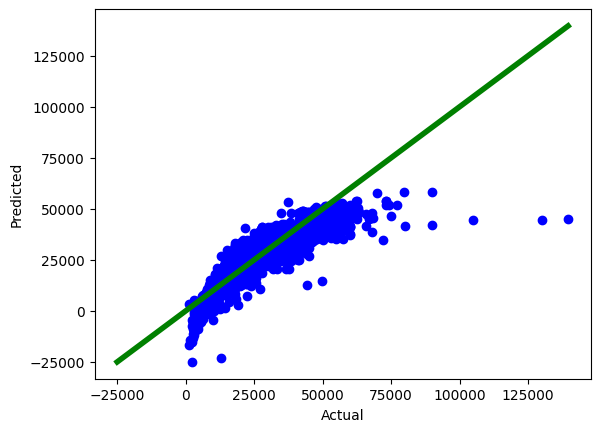

In [9]:
# Show actual vs. predicted plot
actual_vs_predicted_plot(y_test, y_pred)

# Build Model - Decision Tree Regression

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Instantiate Model
tree = DecisionTreeRegressor() # try with n_estimators=1000)

# Create Train Data
X = train.drop("price", axis=1)
y = train["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# fit model
tree.fit(X_train, y_train)

#make prediction
y_pred = tree.predict(X_test)

# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean Squared Error: " + str(mse))

Mean Squared Error: 3341.434104837512


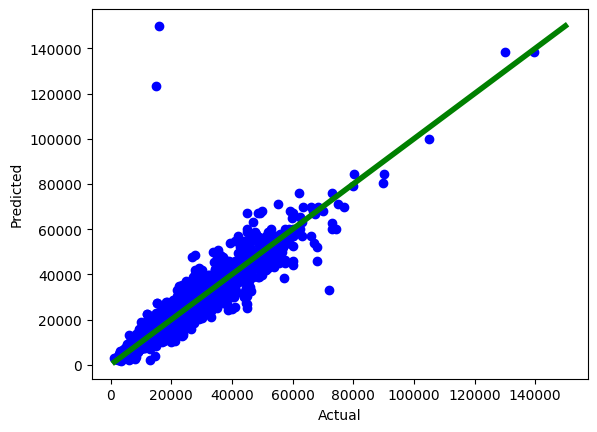

In [11]:
# Show actual vs. predicted plot
actual_vs_predicted_plot(y_test, y_pred)

# Build Model 1 - Random Forest regression

First step of building the model: we train the model with the data split into train and test for further optimisation by tuning hyperparameters

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer


# Instantiate Model
forest = RandomForestRegressor(max_features = 16, max_depth=50, n_estimators=900, random_state=1)

# Create Train Data
X = train.drop("price", axis=1)
y = train["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# fit model
forest.fit(X_train, y_train)


# make prediction
y_pred = forest.predict(X_test)

# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred, squared=False) 
print("Mean Squared Error: " + str(mse))


Mean Squared Error: 2096.3873107854397


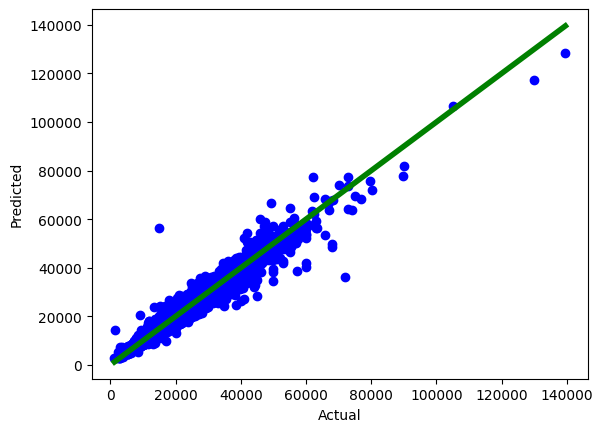

In [13]:
# Show actual vs. predicted plot
actual_vs_predicted_plot(y_test, y_pred)

# Implementation Help for Grid Search

Run a Grid Search to find the best combination of hyperparameters. Output the interrim results using the `verbose()` property.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

# fit model
RMSE = make_scorer(mean_squared_error, squared = False, greater_is_better=False) #we create an RMSE scoring function
parameters = {"max_features": [8, 16], # if needed add other values to the list like 20, 24, etc.
              "n_estimators": [500, 900],  # if needed add other values to the list like 1000
              "max_depth": [25, 50] # if needed add other values to the list like  65
              }
                                                         # hyperparameters to be optimized;
model_CV = GridSearchCV(forest, parameters, scoring=RMSE, cv=5,verbose=3) # Apply 5 Cross Validiation Folds to find best hyperparameters
model_CV.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END max_depth=25, max_features=8, n_estimators=500;, score=-2129.597 total time=  29.9s
[CV 2/5] END max_depth=25, max_features=8, n_estimators=500;, score=-3150.672 total time=  29.5s
[CV 3/5] END max_depth=25, max_features=8, n_estimators=500;, score=-2283.213 total time=  29.2s
[CV 4/5] END max_depth=25, max_features=8, n_estimators=500;, score=-2237.753 total time=  27.1s
[CV 5/5] END max_depth=25, max_features=8, n_estimators=500;, score=-2160.731 total time=  27.9s
[CV 1/5] END max_depth=25, max_features=8, n_estimators=900;, score=-2129.509 total time=  44.5s
[CV 2/5] END max_depth=25, max_features=8, n_estimators=900;, score=-3154.242 total time=  39.7s
[CV 3/5] END max_depth=25, max_features=8, n_estimators=900;, score=-2274.367 total time=  39.2s
[CV 4/5] END max_depth=25, max_features=8, n_estimators=900;, score=-2238.885 total time=  39.9s
[CV 5/5] END max_depth=25, max_features=8, n_estimators=900;, score

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=50, max_features=16,
                                             n_estimators=900, random_state=1),
             param_grid={'max_depth': [25, 50], 'max_features': [8, 16],
                         'n_estimators': [500, 900]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),
             verbose=3)

In [22]:
model_CV.best_params_

{'max_depth': 50, 'max_features': 16, 'n_estimators': 900}

# Build Model 2 - Random Forest regression

In a second step of building the chosen model, we do a second training of the model, this time with the defined hyperparameters, and the extra data we have from left from the split data set in step 1. See the cell at the end of this notebook. Note the changes to the following, compared to the first run of training the model:
- the line with the `train_test_split()` function -  its removed
- the line with the prediction `y_pred = ...` -  its removed
- the lines evaluating the model performance using the `mean_squared_error()` function - its remvoved
- we now fit the model to the complete data using `forest.fit(X, y)`

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer


# Instantiate Model
forest = RandomForestRegressor(max_features = 16, max_depth=50, n_estimators=900, random_state=1)

# Create Train Data
X = train.drop("price", axis=1)
y = train["price"]

# fit model
forest.fit(X, y) # show this line in the second run

RandomForestRegressor(max_depth=50, max_features=16, n_estimators=900,
                      random_state=1)

We can now submit this model to Kaggle.

# Save Results for Submission

Make predictions on test for random forest model

In [16]:
test_predictions= forest.predict(test)

## Define submission function and file 

In [17]:
forest_model_name = "Group2Submission4.csv"

In [18]:
def save_submission_for_kaggle(model_name, test_predictions, test):
  import pandas as pd
  submission_data = pd.DataFrame({"ID": test["ID"], "Actual": test_predictions})
  submission_data.to_csv(model_name, index=False)

## Save submission file

In [19]:
save_submission_for_kaggle(forest_model_name, test_predictions, test)

## FOR GOOGLE COLAB USERS ONLY: Download the created file

In [ ]:
try:
  from google.colab import files
  files.download(forest_model_name)
except ModuleNotFoundError:
  print("Not using Google Colab")

Not using Google Colab


## FOR ANACONDA USERS ONLY: Find the created file in your folder structure

The file is located in the same directory as your notebook.

In [20]:
# run this cell if you don't know the location
import os
print(os.getcwd())

/home/jean/Documents/dev/cas-learn/learning-module3
